In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML
from datetime import datetime
from pathlib import Path

In [8]:
df = pd.read_csv('data.csv')
df.head()

,age,gender,race,datetime,filepath
0,35,F,White,16/01/2017 20:15:44.674000,../datasets/utk-face/part2/35_1_0_201701162015...
1,25,F,Asian,16/01/2017 17:48:45.535000,../datasets/utk-face/part2/25_1_2_201701161748...
2,35,F,Black,13/01/2017 00:54:02.981000,../datasets/utk-face/part2/35_1_1_201701130054...
3,30,M,White,17/01/2017 18:13:20.940000,../datasets/utk-face/part2/30_0_0_201701171813...
4,28,F,White,17/01/2017 12:20:08.648000,../datasets/utk-face/part2/28_1_0_201701171220...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24104 entries, 0 to 24103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       24104 non-null  int64 
 1   gender    24104 non-null  object
 2   race      24104 non-null  object
 3   datetime  24104 non-null  object
 4   filepath  24104 non-null  object
dtypes: int64(1), object(4)
memory usage: 941.7+ KB


<AxesSubplot:>

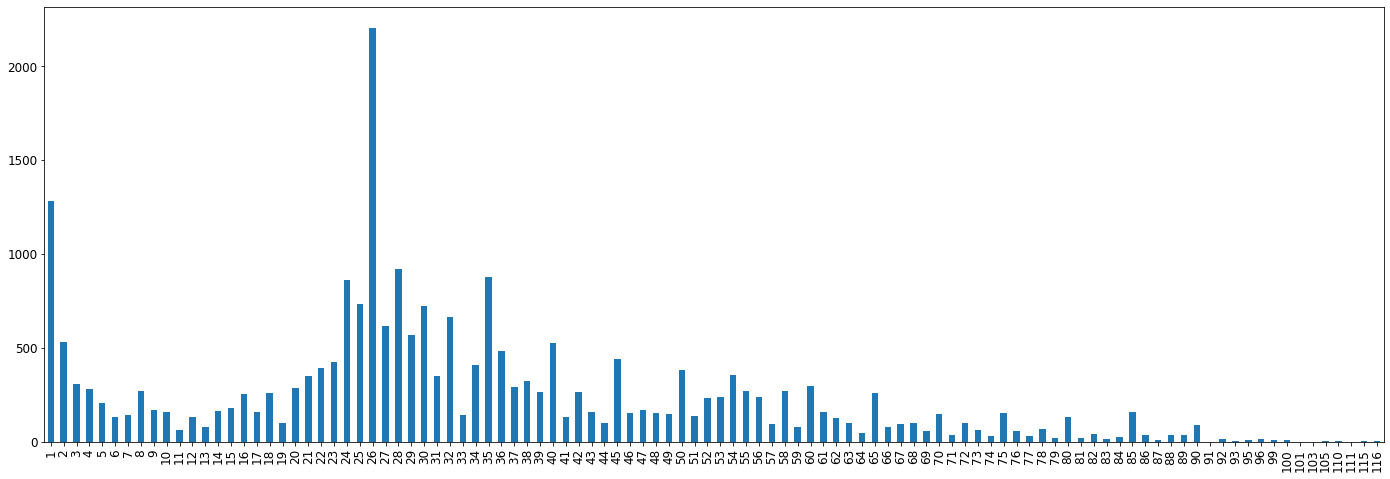

In [10]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [11]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [12]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  18.78%


In [19]:
samples = df.sample(n=18)
samples.head()

,age,gender,race,datetime,filepath
18667,3,F,Asian,19/12/2016 15:14:48.835000,../datasets/utk-face/part1/3_1_2_2016121915144...
8683,27,F,Black,12/01/2017 23:40:22.671000,../datasets/utk-face/part2/27_1_1_201701122340...
19379,39,M,White,04/01/2017 20:23:00.394000,../datasets/utk-face/part1/39_0_0_201701042023...
16817,45,F,White,04/01/2017 18:50:42.110000,../datasets/utk-face/part1/45_1_0_201701041850...
9474,24,F,Black,13/01/2017 01:11:57.712000,../datasets/utk-face/part2/24_1_1_201701130111...


In [20]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['filepath']):
        image = Image.open(image_path).convert('RGB')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image, cmap=None, interpolation='nearest')
        ax.axis('off')  # Turn off axis
    
    plt.show()

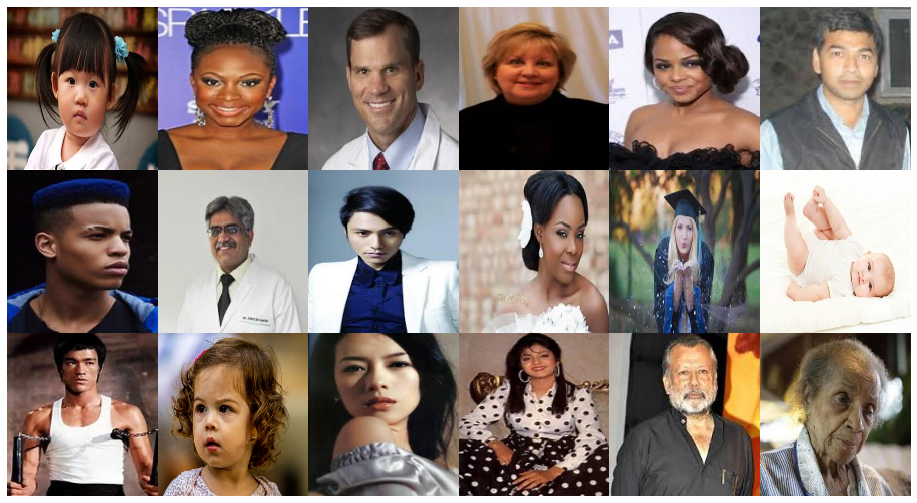

In [21]:
display_image_grid(samples, n_rows=3, n_cols=6)